In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
#read files
pr = pd.read_csv('./data/prc.csv')
br = pd.read_csv('./data/brc.csv')

In [9]:
#Displays Privacy Rights Dataset
#pr[0:5,:]
pr

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
0,"October 7, 2015",LoopPay,Woburn,Massachusetts,HACK,BSO,0,"""Months before its technology became the cente...",Media,https://www.nytimes.com/2015/10/08/technology/...,2017,42.479262,-71.152277
1,"September 1, 2016",New York State Psychiatric Institute,New York,New York,HACK,GOV,"21,880","""The New York State Office of Mental Health (O...",Media,https://healthitsecurity.com/news/ny-psychiatr...,2017,40.712784,-74.005941
2,"January 8, 2017",E-Sports Entertainment Association (ESEA),Cologne,Berlin,HACK,BSO,"1,503,710","""E-Sports Entertainment Association (ESEA), on...",Media,http://www.csoonline.com/article/3155397/secur...,2017,50.937531,6.960279
3,"January 10, 2017",Legal Aid Society of Orange County (LASOC),Santa Ana,California,DISC,NGO,0,"""LASOC developed the I-CAN! web application, w...",California Attorney General,NaN,2017,33.765160,-117.835264
4,"January 3, 2017",MetroPlus Health Plan,New York,New York,DISC,MED,808,As reported by Health and Human Services unaut...,Government Agency,NaN,2017,40.706783,-74.005889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,"August 6, 2019","One Care Medical, LLC",NaN,Virginia,HACK,MED,634,Location of breached information: Desktop Comp...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2019,0.000000,0.000000
1758,"August 5, 2019","Integrated Regional Laboratories, LLC",NaN,Florida,HACK,MED,"29,644",Location of breached information: Network Serv...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2019,0.000000,0.000000
1759,"August 2, 2019",Wisconsin Diagnostic Laboratories,NaN,Wisconsin,HACK,MED,"114,985",Location of breached information: Other\r\nBus...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2019,0.000000,0.000000
1760,"August 2, 2019",Mount Sinai Hospital,NaN,New York,HACK,MED,"33,730",Location of breached information: Other\r\nBus...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2019,0.000000,0.000000


In [10]:
#Displays Balloon Race Dataset
br

,Entity,alternative name,records lost,YEAR,story,SECTOR,METHOD,interesting story,DATA SENSITIVITY,DISPLAYED RECORDS,Unnamed: 10,source name,1st source link,2nd source link
0,AOL,American Online,"92,000,000",2004,Jun 2004. A former America Online software eng...,web,inside job,NaN,1,"92,000,000",NaN,CNN,http://money.cnn.com/2004/06/23/technology/aol...,NaN
1,Ameritrade Inc.,online broker,"200,000",2005,Apr 2005. Computer backup tape containing pers...,financial,lost device,NaN,2,NaN,NaN,NBC,http://www.nbcnews.com/id/7561268/,NaN
2,Citigroup,NaN,"3,900,000",2005,Jun 2005. Blame the messenger! A box of comput...,financial,lost device,y,3,NaN,NaN,NY Times,http://www.nytimes.com/2005/06/07/business/07d...,NaN
3,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...","40,000,000",2005,Jun 2005. CardSystems was fingered by MasterCa...,financial,hacked,y,3,NaN,NaN,Wired,https://www.wired.com/2005/06/cardsystems-data...,NaN
4,AOL,American Online,"20,000,000",2006,Aug 2006. Derp. AOL voluntarily released searc...,web,oops!,y,1,NaN,NaN,Tech Crunch,http://techcrunch.com/2006/08/06/aol-proudly-r...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Indian Jobseekers,NaN,"275,265,298",2019,May 2019. A huge MongoDB database exposing rec...,web,poor security,NaN,2,275000000,NaN,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,NaN
342,Bulgarian National Revenue Agency,NaN,"5,000,000",2019,Jul 2019. A hacker stole the personal details ...,government,hacked,NaN,2,NaN,NaN,ZDNet,https://www.zdnet.com/article/hacker-steals-da...,NaN
343,Capital One,NaN,"100,000,000",2019,Jul 2019. A former Amazon employee was arreste...,financial,hacked,NaN,3,NaN,NaN,Forbes,https://www.forbes.com/sites/rachelsandler/201...,NaN
344,Suprema,biometrics security company,"27,800,000",2019,Aug 2019. Fingerprints. facial recognition inf...,tech,poor security,NaN,5,NaN,NaN,Guardian,https://www.theguardian.com/technology/2019/au...,NaN


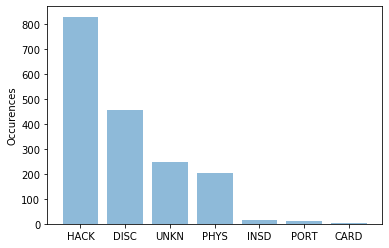

In [11]:
#Shows graph comparing all types of data breach (Privacy Rights)
pr_breach = pr.loc[:, 'Type of breach']
pr_breach_count = pr_breach.value_counts()
pr_breach_index = pr_breach_count.index
plt.bar(pr_breach_index, pr_breach_count, align='center', alpha=0.5)
plt.ylabel('Occurences')
plt.show()

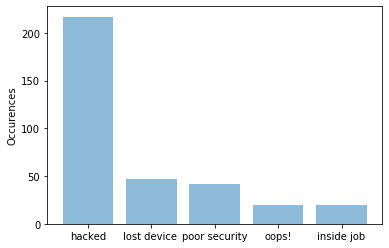

In [12]:
#Shows graph comparing all types of data breach (Balloon Race)
br_breach = br.loc[:, 'METHOD']
br_breach_count = br_breach.value_counts()
br_breach_index = br_breach_count.index
plt.bar(br_breach_index, br_breach_count, align='center', alpha=0.5)
plt.ylabel('Occurences')
plt.show()

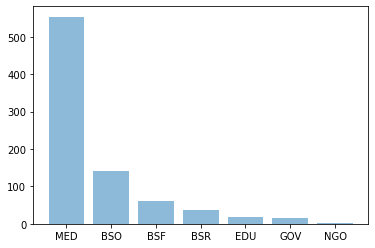

In [13]:
#Shows graph of organization types for each hacked data breach (Privacy Rights)
pr_hacked = pr.loc[pr['Type of breach'] == 'HACK']
pr_type_count = pr_hacked.loc[:, 'Type of organization'].value_counts()
pr_type_index = pr_type_count.index
plt.bar(pr_type_index, pr_type_count, align='center', alpha=0.5)
plt.show()

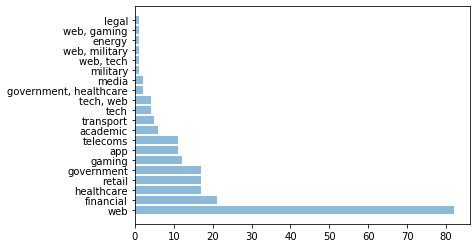

In [14]:
#Shows graph of organization types for each hacked data breach (Balloon Race)
br_hacked = br.loc[br['METHOD'] == 'hacked']
br_type_count = br_hacked.loc[:, 'SECTOR'].value_counts()
br_type_index = br_type_count.index.tolist()
br_pos = [i for i, _ in enumerate(br_type_index)]
plt.barh(br_pos, br_type_count, align='center', alpha=0.5)
plt.yticks(br_pos, br_type_index)
plt.show()

In [15]:
pr_story = pr.loc[:, 'Description of incident'].astype(str)
br_story = br.loc[:, 'story'].astype(str)
br_interesting = br.loc[br['interesting story'] == 'y'].loc[:,'story'] #Only those marked with interesting story

story_total = pd.concat([pr_story, br_story],ignore_index=True)
print(story_total[0])
for story in story_total:
    if(story[0] == '"'):
        story[1:len(story)-1]

"Months before its technology became the centerpiece of Samsung’s new mobile payment system, LoopPay, a small Massachusetts subsidiary of the South Korean electronics giant, was the target of a sophisticated attack by a group of government-affiliated Chinese hackers.As early as March, the hackers — alternatively known as the Codoso Group or Sunshock Group by those who track them — had breached the computer network of LoopPay, a start-up in Burlington, Mass., that was acquired by Samsung in February for more than $250 million, according to several people briefed on the still-unfolding investigation, as well as Samsung and LoopPay executives."


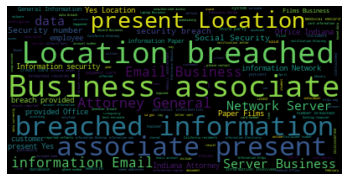

In [16]:
all_text = " ".join(story for story in story_total)
wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()